In [117]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import scipy
from numpy import linalg as LA
from numpy import linalg
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.seterr(divide='ignore', invalid='ignore');

# 1.load the database

In [118]:
import os
from PIL import Image
import numpy as np

import os
from PIL import Image
import numpy as np

def read_images(i):
    path = 'att_faces'
    X=[]
    y=[]
    for i in range(i,40): #40 directories
        for j in range(10):
            img = Image.open(os.path.join(path,'s'+str(i+1),str(j+1)+'.pgm'))
            X.append(np.asarray(img,dtype=np.uint8).flatten())
            y.append(i)
        X = np.asarray(X)
        y = np.asarray(y)
        return X,y
               
aa=[]
bb=[]
aa,bb=read_images(0)
for i in range(1,40):
    a,b=read_images(i)
    a=np.asarray(a)
    b=np.asarray(b)
    aa=np.append(aa,a,axis=0)
    bb=np.append(bb,b,axis=0)        

# 2. plot all the images as a single plot 

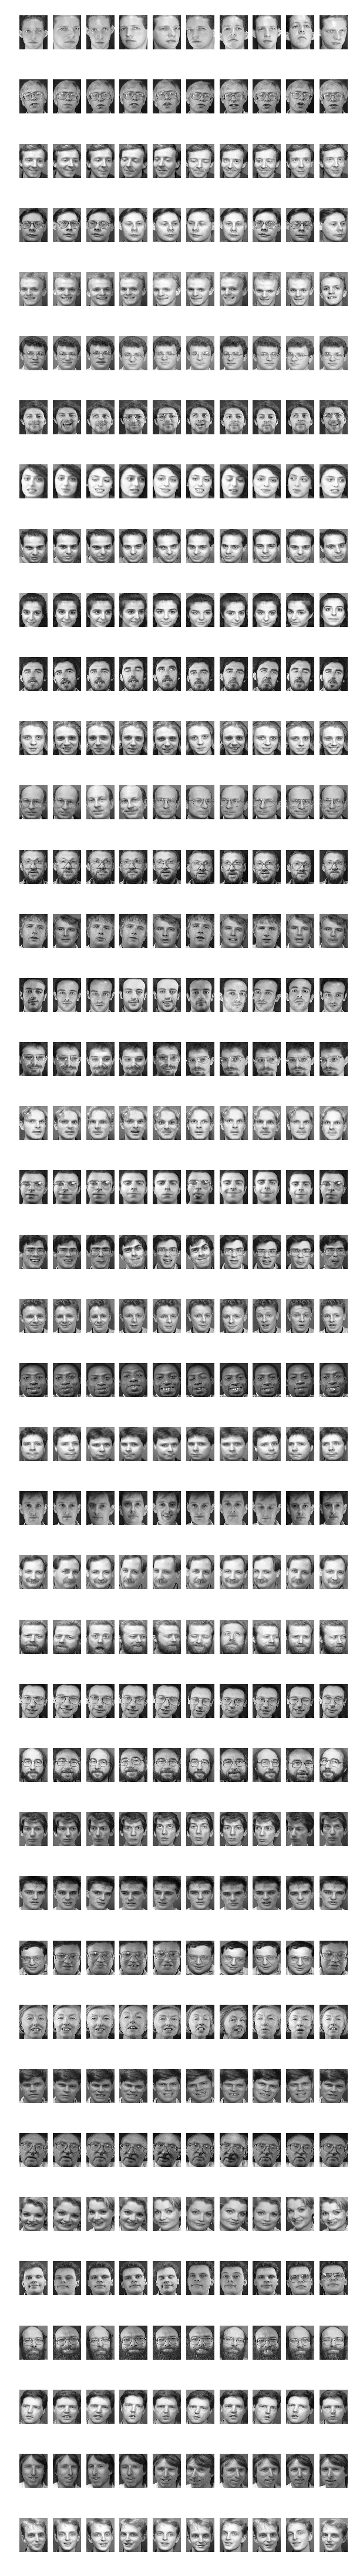

In [63]:
plt.figure(figsize=(10,80))
for i in range (0,400):
    plt.subplot(40,10,i+1)
    img1=aa[i].reshape(112,92)
    plt.imshow(img1,cmap='gray')
    plt.axis('off')
    plt.axis('equal')
plt.show()

# Feature extraction using PCA

1. Taking one random person, and plot all of its images (10 total) (give him a random name)

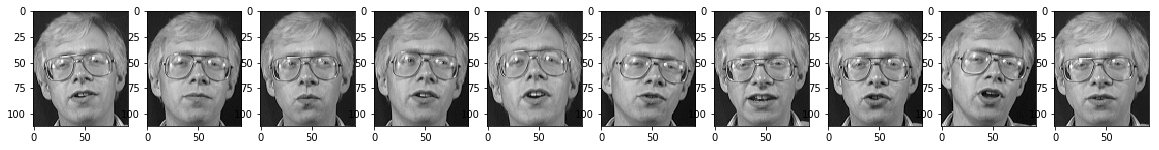

Person Id Number:  1


In [68]:
plt.figure(figsize=(20,10))
person_nubmer=np.random.randint(1,40)
for i in range(0,10):
    imx=aa[(person_nubmer*10)+i].reshape(112,92)
    plt.subplot(1,10,i+1)
    plt.imshow(imx,cmap='gray')
plt.show()
print ('Person Id Number: ',person_nubmer)

2. Using PCA over the data and move to 2D.

In [72]:
def PCA(data,dims_rescaled_data=2):
    m, n = data.shape
    
    data-=data.mean(axis=0)
    
    R=np.cov(data, rowvar=False)
    
    evals, evecs=linalg.eigh(R)
    
    idx=np.argsort(evals)[::-1]
    evecs=evecs[:,idx]
    evals=evals[idx]
    
    evecs=evecs[:, :dims_rescaled_data]
    
    return np.dot(evecs.T,data.T).T,evals,evecs

z,u, evls = PCA(aa.astype('float64'),dims_rescaled_data=2)


In [75]:
print ('Data shape after appllyig PCA:',z.shape)

Data shape after appllyig PCA: (400, 2)


# Without PCA

In [111]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(aa, bb, test_size = 0.25, random_state = 0)

In [77]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [79]:
print ('Error in Prediction:',np.count_nonzero(np.subtract(y_pred,y_test)))

Error in Prediction: 0


In [ ]:
y_pred,y_test

## Score on training data

In [94]:
print ('Classifier Score on Train Data:',  classifier.score(X_train,y_train))

Classifier Score on Train Data: 1.0


## score on test data

In [93]:
print ('Classifier Score on Test Data:',  classifier.score(X_test,y_test))

Classifier Score on Test Data: 1.0


# With PCA

In [97]:
def PCA(data,dims_rescaled_data=2):
    m, n = data.shape
    
    data-=data.mean(axis=0)
    
    R=np.cov(data, rowvar=False)
    
    evals, evecs=linalg.eigh(R)
    
    idx=np.argsort(evals)[::-1]
    evecs=evecs[:,idx]
    evals=evals[idx]
    
    evecs=evecs[:, :dims_rescaled_data]
    
    return np.dot(evecs.T,data.T).T,evals,evecs

reduce_dim,evals,evecs=PCA(aa.astype('float64'),dims_rescaled_data=2)

## Train test split

In [103]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduce_dim, bb, test_size = 0.25, random_state = 0)

In [119]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

## Results (Scores, error )

In [106]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print ('Error in Prediction:',np.count_nonzero(np.subtract(y_pred,y_test)))

print ('Classifier Score on Train Data:',  classifier.score(X_train,y_train))

print ('Classifier Score on Test Data:',  classifier.score(X_test,y_test))

Error in Prediction: 97


# cross-validation

checking pca from 1 to 10.

In [120]:
for g in range(1,11):
    reduce_dim,evals,evecs=PCA(aa.astype('float64'),dims_rescaled_data=g)

    # Splitting the dataset into the Training set and Test set
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(reduce_dim, bb, test_size = 0.25, random_state = 0)

    # Fitting classifier to the Training set
    from sklearn.svm import SVC
    classifier=SVC(kernel='linear',random_state=0)
    classifier.fit(X_train,y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    print ('Error in Prediction After PCA dimension Reduction K='+str(g)+' :',np.count_nonzero(np.subtract(y_pred,y_test)))
    print ('Classifier Score on Test Data After PCA dimension Reduction K='+str(g)+' :',  classifier.score(X_test,y_test))

Error in Prediction After PCA dimension Reduction K=1 : 94
Classifier Score on Test Data After PCA dimension Reduction K=1 : 0.06
Error in Prediction After PCA dimension Reduction K=2 : 67
Classifier Score on Test Data After PCA dimension Reduction K=2 : 0.33
Error in Prediction After PCA dimension Reduction K=3 : 36
Classifier Score on Test Data After PCA dimension Reduction K=3 : 0.64
Error in Prediction After PCA dimension Reduction K=4 : 27
Classifier Score on Test Data After PCA dimension Reduction K=4 : 0.73
Error in Prediction After PCA dimension Reduction K=5 : 12
Classifier Score on Test Data After PCA dimension Reduction K=5 : 0.88
Error in Prediction After PCA dimension Reduction K=6 : 13
Classifier Score on Test Data After PCA dimension Reduction K=6 : 0.87
Error in Prediction After PCA dimension Reduction K=7 : 4
Classifier Score on Test Data After PCA dimension Reduction K=7 : 0.96
Error in Prediction After PCA dimension Reduction K=8 : 3
Classifier Score on Test Data Aft